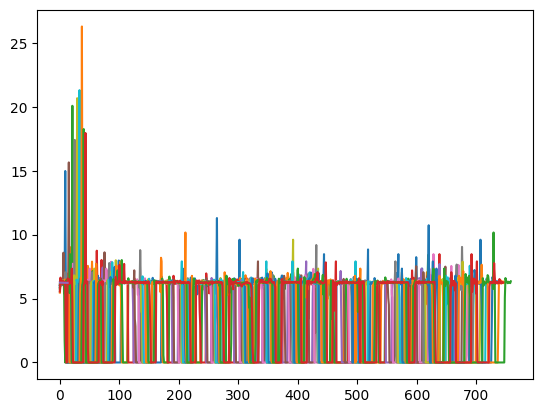

In [14]:
from Simulation import Simulation
from funcionstemp import earth_radius
from matplotlib import pyplot as plt
import math
import statistics

simulacao = Simulation("osmWithStop.xml")
#simulacao.export_to_video("simulation_video")

carro = simulacao.getVehicleById("f_0.0")

factors_list = []
for a in simulacao.vehicleList.keys():
    carro = simulacao.getVehicleById(a)
    factor = []
    for i in range(simulacao.get_timestep_total()):
        if carro.is_present(i) and carro.is_present(i+1):
            timestep1 = carro.get_timestep(i)
            x1 = timestep1.x()
            y1 = timestep1.y()
            timestep2 = carro.get_timestep(i+1)
            x2 = timestep2.x()
            y2 = timestep2.y()
            vel = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)*earth_radius/360
            if vel == 0:
                factor.append(0)
            else:
                factor.append(timestep2.speed()/vel)
    plt.plot(factor)
    factors_list.append(statistics.median(factor))

plt.plot(factors_list)



#speed/dist

In [15]:
from math import radians, cos, sin, sqrt, atan2

# Earth's radius in kilometers
R = 6371.0

# Example coordinates (latitude and longitude)
# Point 1 (lat1, lon1) and Point 2 (lat2, lon2)
lat1, lon1 = radians(-38.569393), radians(-3.738326)  # Converting degrees to radians
lat2, lon2 = radians(-38.569398), radians(-3.738334)

# Difference in coordinates
dlat = lat2 - lat1
dlon = lon2 - lon1

# Haversine formula
a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))
distance = R * c

# Time difference example in hours
time_hours = 1.5  # Let's assume the time difference is 1.5 hours

# Speed calculation
speed_km_per_hour = distance / time_hours

distance, speed_km_per_hour

(0.0008904130077455582, 0.0005936086718303721)

In [16]:
# Example coordinates (latitude and longitude)
# Point 1 (lat1, lon1) and Point 2 (lat2, lon2)
lat1, lon1 = radians(-38.569398), radians(-3.738334)  # Converting degrees to radians
lat2, lon2 = radians(-38.569407), radians(-3.738349)

# Difference in coordinates
dlat = lat2 - lat1
dlon = lon2 - lon1

# Haversine formula
a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))
distance = R * c

# Time difference example in hours
time_hours = 1.5  # Let's assume the time difference is 1.5 hours

# Speed calculation
speed_km_per_hour = distance / time_hours

distance, speed_km_per_hour

(0.0016438106707261668, 0.0010958737804841112)

In [17]:
print(0.0010958737804841112*1.02/0.0005936086718303721)

1.88304401390755


In [18]:
print(1.02/0.0005936086718303721)

1718.3037384795355


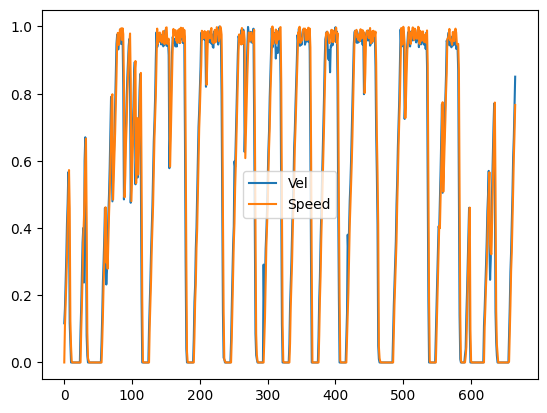

In [36]:
from Simulation import Simulation
from funcionstemp import earth_radius
from matplotlib import pyplot as plt
import math
import statistics


simulacao = Simulation("osmWithStop.xml")
#simulacao.export_to_video("simulation_video")

carro = simulacao.getVehicleById("f_0.0")

factors_list = []
z=0
for a in simulacao.vehicleList.keys():
    carro = simulacao.getVehicleById(a)
    factor = []
    vel_list = []
    speed_list = []

    for i in range(simulacao.get_timestep_total()):
        if carro.is_present(i) and carro.is_present(i+1):
            timestep1 = carro.get_timestep(i)
            x1 = timestep1.x()
            y1 = timestep1.y()
            timestep2 = carro.get_timestep(i+1)
            x2 = timestep2.x()
            y2 = timestep2.y()
            vel = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)*earth_radius/360
            vel_list.append(vel)
            speed_list.append(timestep1.speed())
    max_vel = max(vel_list)
    min_vel = min(vel_list)
    max_speed = max(speed_list)
    min_speed = min(speed_list)
    norm_vel = list((map(lambda x: (x-min_vel)/max_vel,vel_list)))
    norm_speed = list(map(lambda x: (x-min_speed)/max_speed,speed_list))
    if z == 0:
        plt.plot(norm_vel,label="Vel")
        plt.plot(norm_speed,label="Speed")
        plt.legend()
    z+=1

#plt.plot(factors_list)


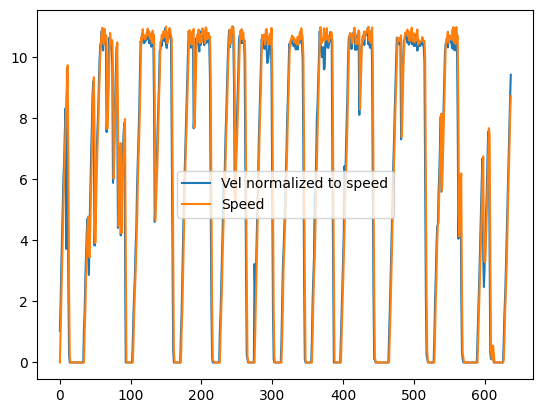

In [41]:
from Simulation import Simulation
from funcionstemp import earth_radius
from matplotlib import pyplot as plt
import math
import statistics


simulacao = Simulation("osmWithStop.xml")
#simulacao.export_to_video("simulation_video")

carro = simulacao.getVehicleById("f_0.0")

full_speed_list = []
z=0
for a in simulacao.vehicleList.keys():
    carro = simulacao.getVehicleById(a)
    factor = []
    vel_list = []
    speed_list = []

    for i in range(simulacao.get_timestep_total()):
        if carro.is_present(i) and carro.is_present(i+1):
            timestep1 = carro.get_timestep(i)
            x1 = timestep1.x()
            y1 = timestep1.y()
            timestep2 = carro.get_timestep(i+1)
            x2 = timestep2.x()
            y2 = timestep2.y()
            vel = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)*earth_radius/360
            vel_list.append(vel)
            speed_list.append(timestep1.speed())
            full_speed_list.append(timestep1.speed())
    
    if z == 0:
        break
    z+=1

max_vel = max(vel_list)
min_vel = min(vel_list)
max_speed = max(full_speed_list)
min_speed = min(full_speed_list)
norm_vel = list((map(lambda x: (x-min_vel)/(max_vel-min_vel),vel_list)))
norm_vel_speed = list((map(lambda x: x * (max_speed-min_speed) + min_speed,norm_vel)))

plt.plot(norm_vel_speed,label="Vel normalized to speed")
plt.plot(speed_list,label="Speed")
plt.legend()


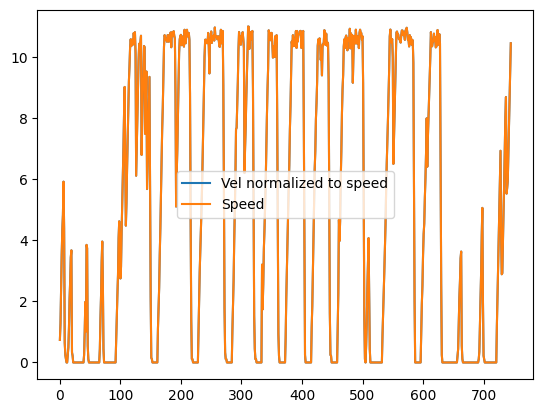

In [53]:
from Simulation import Simulation
from funcionstemp import earth_radius
from matplotlib import pyplot as plt
import math
import statistics


simulacao = Simulation("osmWithStop.xml")
#simulacao.export_to_video("simulation_video")

carro = simulacao.getVehicleById("f_0.0")

full_speed_list = []
z=0
for a in simulacao.vehicleList.keys():
    carro = simulacao.getVehicleById(a)
    factor = []
    vel_list = []
    speed_list = []

    for i in range(simulacao.get_timestep_total()):
        if carro.is_present(i) and carro.is_present(i+1):
            timestep1 = carro.get_timestep(i)
            x1 = timestep1.x()
            y1 = timestep1.y()
            timestep2 = carro.get_timestep(i+1)
            x2 = timestep2.x()
            y2 = timestep2.y()
            vel = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)*earth_radius/360
            vel_list.append(vel)
            speed_list.append(timestep1.speed())

    full_speed_list.append(speed_list)
    
max_vel = max(vel_list)
min_vel = min(vel_list)
max_speed1 = max(full_speed_list[0])
min_speed1 = min(full_speed_list[0])
max_speed2 = max([max(speed_list) for speed_list in full_speed_list])
min_speed2 = min([min(speed_list) for speed_list in full_speed_list])
norm_vel = list((map(lambda x: (x-min_vel)/(max_vel-min_vel),vel_list)))

norm_vel_speed1 = list((map(lambda x: x * (max_speed1-min_speed1) + min_speed1,norm_vel)))

norm_vel_speed2 = list((map(lambda x: x * (max_speed2-min_speed2) + min_speed2,norm_vel)))

plt.plot(norm_vel_speed1,label="Vel normalized to speed")
plt.plot(norm_vel_speed2,label="Speed")
plt.legend()
